In [253]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
import os
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import pandas as pd
#from sklearn import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

In [144]:
train_path='./feature1'
pfizer_path='./pfizer'
valid_path='./valid'


print('训练集数量：',len(os.listdir(train_path)))

print('辉瑞集数量：',len(os.listdir(pfizer_path)))

print('验证集数量：',len(os.listdir(valid_path)))


data_train = pd.DataFrame()
for i in os.listdir(train_path):
    data1 = pd.read_csv(train_path+'/'+i)
#     data1.insert(0, 'source', i.split('.')[1])
    data_train = pd.concat([data_train, data1])
    
data_pfizer = pd.DataFrame()
for i in os.listdir(pfizer_path):
    data1 = pd.read_csv(pfizer_path+'/'+i)
#     data1.insert(0, 'source', i.split('.')[1])
    data_pfizer = pd.concat([data_pfizer, data1])
    
data_valid = pd.DataFrame()
for i in os.listdir(valid_path):
    data1 = pd.read_csv(valid_path+'/'+i)
#     data1.insert(0, 'source', i.split('.')[1])
    data_valid = pd.concat([data_valid, data1])
    
    
train_feature=list(data_valid)
values_to_remove=['CAS Registry Number','Canonical SMILES','key',]
train_feature = [x for x in train_feature if x not in values_to_remove]

scaler = StandardScaler()#标准化数据

训练集数量： 87
辉瑞集数量： 30
验证集数量： 5


In [214]:
data_train2 = pd.read_csv(r"C:\Users\99159\Desktop\PCC调参\train_improve.csv")
#data_pfizer = pd.read_csv(r"C:\Users\99159\Desktop\PCC调参\pfizer_improve.csv")

In [327]:
def run (seed,model):
    data_train_train, data_train_test = train_test_split(data_train2, test_size=0.2, random_state=seed)
    #data_train = data_train[(data_train['cc_num'] > 1)]

    X_train=data_train_train[train_feature].fillna(0)
    X_train= scaler.fit_transform(X_train)
    y_train = data_train_train['key']

    undersampled = RandomUnderSampler(sampling_strategy=1, random_state=3)
    X_train, y_train = undersampled.fit_resample(X_train, y_train)

    # print('训练集化合物数量：',len(y_train))
    # print(pd.Series(data_train['key']).value_counts())

    model = model.fit(X_train, y_train)
    #model.save_model(str(seed)+'_xgb_model.json')

    # importance_scores = model.feature_importances_
    # feature_names =data_train[train_feature].columns
    # sorted_indices = np.argsort(importance_scores)
    # sorted_importance_scores = importance_scores[sorted_indices]
    # sorted_feature_names = feature_names[sorted_indices]
    # plt.figure(figsize=(10, 100))
    # bar_positions = np.arange(len(sorted_importance_scores))
    # bar_heights = sorted_importance_scores
    # plt.barh(bar_positions, bar_heights, height=0.5)  # 设置height参数为0.5来增加间隔
    # plt.yticks(bar_positions, sorted_feature_names)
    # plt.xlabel('Importance Score')
    # plt.ylabel('Features')
    # plt.title('Feature Importance')
    # plt.margins(y=0)
    # plt.tight_layout()
    # plt.show()

    X_test= data_train_test[train_feature].fillna(0)
    X_test = scaler.fit_transform(X_test)
    y_test = data_train_test['key']

    # print('测试集化合物数量：',len(y_test))
    # print(pd.Series(data_test['key']).value_counts())

    y_pred = model.predict(X_test)

    m=confusion_matrix(y_test, y_pred)
    test_hit=recall_score(y_test,y_pred)
    test_cut=m[0][1] / (m[0][0] + m[0][1]+ m[1][0]+ m[1][1])
#     print('hitting rate / recall:',hitting rate)
#     print('cutting rate / FP/N:',cutting rate)

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_prob)
    test_roc = auc(fpr1, tpr1)
#     print('roc_auc',roc_auc)
    test_F1 = f1_score(y_test, y_pred)
#     print("F1 Score:", f1)
    #plot_confusion_matrix(cm = confusion_matrix(y_test,y_pred_prob),target_name = ['Key compounds, Others'],title = "Confusion Matrix") 
    y_pred_2 = np.around(y_pred_prob,0).astype(int)
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred_2)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot()
    #plt.savefig(r'C:\Users\99159\Desktop\PCC调参\Test_xgb_Matrix.jpeg', dpi=600)
    plt.show()

    X_test= data_pfizer[train_feature].fillna(0)
    X_test = scaler.fit_transform(X_test)
    y_test = data_pfizer['key']

    y_pred = model.predict(X_test)

    m=confusion_matrix(y_test, y_pred)
    pfizer_hit=recall_score(y_test,y_pred)
    pfizer_cut=m[0][1] / (m[0][0] + m[0][1]+ m[1][0]+ m[1][1])
#     print('hitting rate / recall:',hitting rate)
#     print('cutting rate / FP/N:',cutting rate)

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_prob)
    pfizer_roc = auc(fpr2, tpr2)
#     print('roc_auc',roc_auc)
    pfizer_F1 = f1_score(y_test, y_pred)
#     print("F1 Score:", f1)
    y_pred_3 = np.around(y_pred_prob,0).astype(int)
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred_3)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot()
    #plt.savefig(r'C:\Users\99159\Desktop\PCC调参\Valid1_xgb_Matrix.jpeg', dpi=600)
    plt.show()



    X_test= data_valid[train_feature].fillna(0)
    X_test = scaler.fit_transform(X_test)
    y_test = data_valid['key']

    y_pred = model.predict(X_test)

    m=confusion_matrix(y_test, y_pred)
    valid_hit=recall_score(y_test,y_pred)
    valid_cut=m[0][1] / (m[0][0] + m[0][1]+ m[1][0]+ m[1][1])
#     print('hitting rate / recall:',hitting rate)
#     print('cutting rate / FP/N:',cutting rate)

    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_prob)
    valid_roc = auc(fpr3, tpr3)
#     print('roc_auc',roc_auc)
    valid_F1 = f1_score(y_test, y_pred)
#     print("F1 Score:", f1)
    y_pred_4 = np.around(y_pred_prob,0).astype(int)
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred_4)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    disp.plot()
    #plt.savefig(r'C:\Users\99159\Desktop\PCC调参\Valid2_xgb_Matrix.jpeg', dpi=600)
    plt.show()


    plt.figure(figsize=(8, 6))
    plt.plot(fpr1, tpr1, label='Test ROC (AUC = %0.2f)' % test_roc)
    plt.plot(fpr2, tpr2, label='Valid1 ROC (AUC = %0.2f)' % pfizer_roc)
    plt.plot(fpr3, tpr3, label='Valid2 ROC (AUC = %0.2f)' % valid_roc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    #plt.savefig(r'C:\Users\99159\Desktop\PCC调参\xgb_ROC.jpeg', dpi=600)
    plt.show()


    return (pd.DataFrame({'seed': [seed], 'test_hit': [test_hit], 'test_cut': [test_cut], 'test_roc': [test_roc], 'test_F1': [test_F1], 'pfizer_hit': [pfizer_hit], 'pfizer_cut': [pfizer_cut], 'pfizer_roc': [pfizer_roc], 'pfizer_F1': [pfizer_F1], 'valid_hit': [valid_hit], 'valid_cut': [valid_cut], 'valid_roc': [valid_roc], 'valid_F1': [valid_F1]}))

In [320]:
model = XGBClassifier(scale_pos_weight = 450,#hit正比
                          subsample = 0.6 ,#和cut正比 越小算法越保守
                          n_estimators = 500,#越大 cut越小
                          min_child_weight = 3,
                          objective ='binary:logistic',
                          max_depth =2,
                          eta = 0.2,
                          colsample_bytree = 0.1,
                          max_delta_step = 0.1,
                          seed = 0,
                          eval_metric = 'auc') 

In [326]:
model = MLPClassifier(hidden_layer_sizes =(128,64,32),random_state = 3,
                      activation = 'relu',
                      solver = 'lbfgs',
                      max_iter = 100)

In [51]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =100,
                               class_weight = {1:800,0:1},
                               max_depth = 2)

In [207]:
#from sklearn.ensemble import RandomForestClassifier
model = svm.SVC(gamma='scale', C=200, probability=True,
                decision_function_shape='ovr', kernel='rbf')

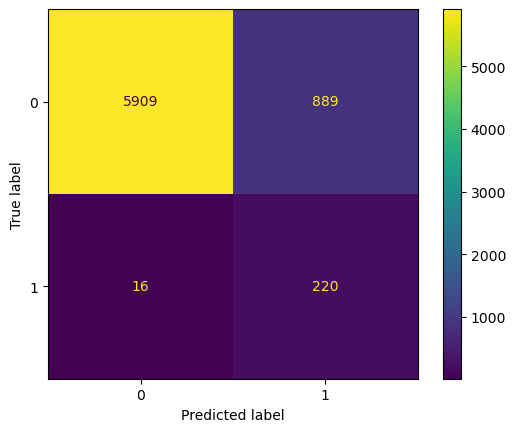

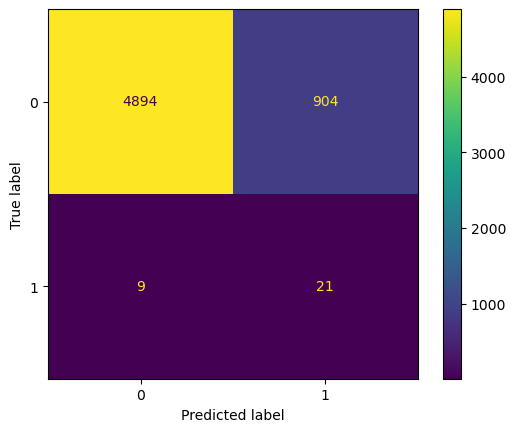

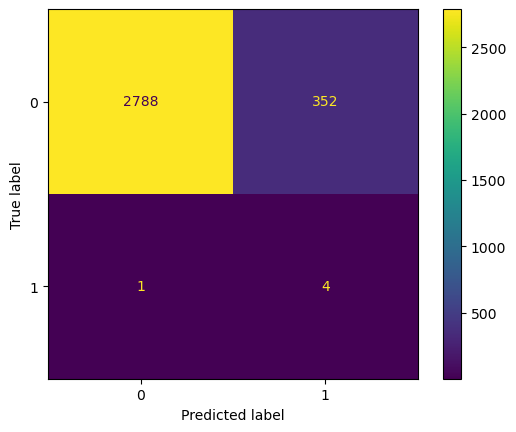

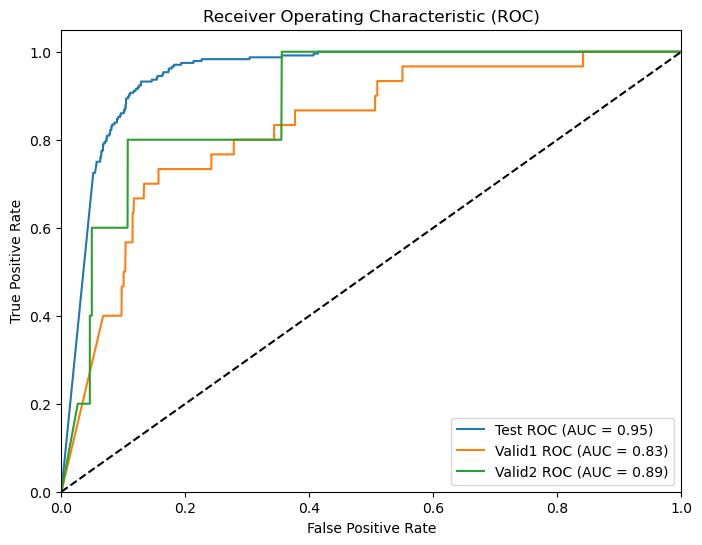

   seed  test_hit  test_cut  test_roc  test_F1  pfizer_hit  pfizer_cut  pfizer_roc  pfizer_F1  valid_hit  valid_cut  valid_roc  valid_F1
0     2      0.93      0.13      0.95     0.33        0.70        0.16        0.83       0.04       0.80       0.11       0.89      0.02


In [329]:
df = pd.DataFrame(columns=['seed', 'test_hit', 'test_cut', 'test_roc', 'test_F1', 'pfizer_hit', 'pfizer_cut', 'pfizer_roc', 'pfizer_F1', 'valid_hit', 'valid_cut', 'valid_roc', 'valid_F1'])
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', '{:.2f}'.format)

for i in range(2,3):
    new_row=run(i,model)
    df = pd.concat([df, new_row])
    print(new_row)
#df.to_excel(r"C:\Users\99159\Desktop\PCC调参\mlp2.xlsx", index=False)

In [ ]:
df = data_train.loc[data_train['key']==1]

In [302]:
from eli5.sklearn import PermutationImportance
import shap
import eli5

In [332]:
model = MLPClassifier(hidden_layer_sizes =(128,64,32),random_state = 3,
                      activation = 'relu',
                      solver = 'lbfgs',
                      max_iter = 100)

data_train_train, data_train_test = train_test_split(data_train2, test_size=0.2, random_state=2)
    #data_train = data_train[(data_train['cc_num'] > 1)]

X_train=data_train_train[train_feature].fillna(0)
X_train= scaler.fit_transform(X_train)
y_train = data_train_train['key']

undersampled = RandomUnderSampler(sampling_strategy=1, random_state=3)
X_train, y_train = undersampled.fit_resample(X_train, y_train)

X_test= data_train_test[train_feature].fillna(0)
X_test = scaler.fit_transform(X_test)
y_test = data_train_test['key']

    # print('测试集化合物数量：',len(y_test))
    # print(pd.Series(data_test['key']).value_counts())

#y_pred = model.predict(X_test)


model = model.fit(X_train, y_train)

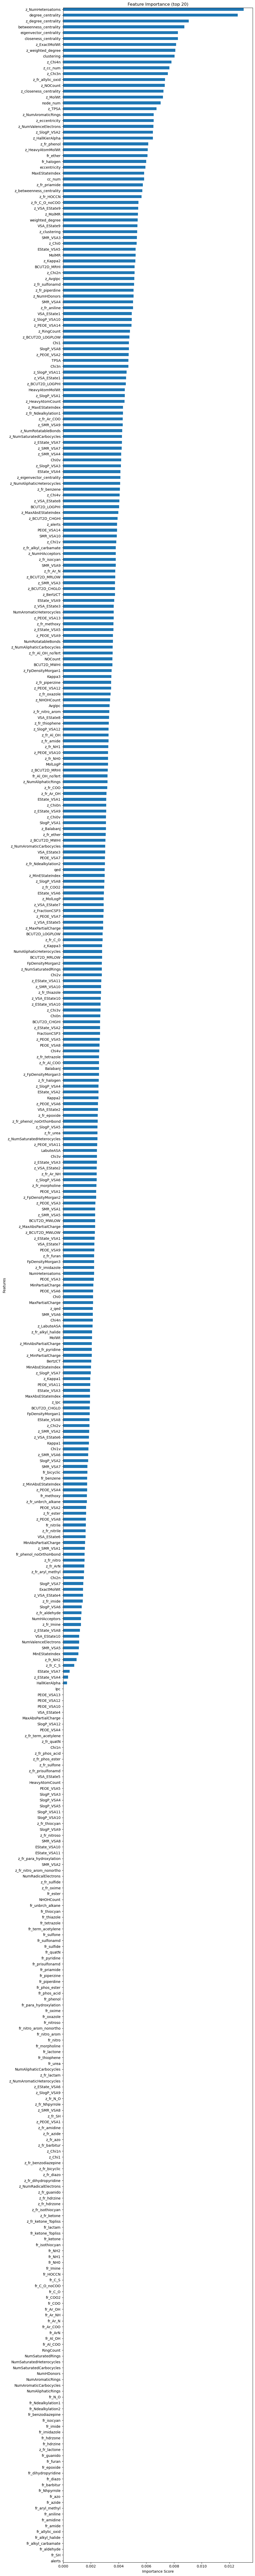

In [323]:
importance_scores = model.feature_importances_
feature_names =data_train[train_feature].columns
sorted_indices = np.argsort(importance_scores)
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
plt.figure(figsize=(10, 100))
bar_positions = np.arange(len(sorted_importance_scores))
bar_heights = sorted_importance_scores
plt.barh(bar_positions, bar_heights, height=0.5)  # 设置height参数为0.5来增加间隔
plt.yticks(bar_positions, sorted_feature_names)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance (top 20)')
plt.margins(y=0)
plt.tight_layout()
plt.show()

In [333]:
perm = PermutationImportance(model, random_state=1,scoring = 'roc_auc').fit(X_test, y_test)
X_test= data_train_test[train_feature].fillna(0)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(),top=30)

Weight,Feature
0.0041 ± 0.0014,z_PEOE_VSA7
0.0034 ± 0.0005,fr_nitro_arom
0.0030 ± 0.0017,PEOE_VSA8
0.0029 ± 0.0007,z_fr_benzene
0.0027 ± 0.0009,z_SMR_VSA7
0.0026 ± 0.0024,z_NumAromaticCarbocycles
0.0026 ± 0.0016,SMR_VSA9
0.0024 ± 0.0015,PEOE_VSA9
0.0023 ± 0.0005,SlogP_VSA6
0.0023 ± 0.0016,eccentricity
